Today we are going to make 10-15 interesting visualizations from this TransfrMarkt dataset

In [89]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv(r"C:\Users\HAMMAD\Desktop\Top 500 Most Valuable Footballers in the World.csv")

In [96]:
df.head()

,Player,Position,Age,Nationality1,Nationality2,Club,MarketValue(m)
0,Erling Haaland,Centre-Forward,22,Norway,NaN,Manchester City,180
1,Kylian Mbappé,Centre-Forward,24,France,Cameroon,Paris Saint-Germain,180
2,Vinicius Junior,Left Winger,22,Brazil,Spain,Real Madrid,150
3,Jude Bellingham,Central Midfield,20,England,NaN,Real Madrid,120
4,Bukayo Saka,Right Winger,21,England,Nigeria,Arsenal FC,120


In [18]:
print(df.columns)

Index(['Player', 'Position', 'Age', 'Nationality1', 'Nationality2', 'Club',
       'MarketValue(m)'],
      dtype='object')


In [10]:
# Get summary statistics of numerical columns
print(df.describe())

              Age  MarketValue(m)
count  500.000000      500.000000
mean    24.884000       36.770000
std      3.167113       21.760978
min     16.000000       18.000000
25%     23.000000       22.000000
50%     25.000000       30.000000
75%     27.000000       40.000000
max     36.000000      180.000000


In [11]:
# Check the data types of columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Player          500 non-null    object
 1   Position        500 non-null    object
 2   Age             500 non-null    int64 
 3   Nationality1    500 non-null    object
 4   Nationality2    209 non-null    object
 5   Club            500 non-null    object
 6   MarketValue(m)  500 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 27.5+ KB
None


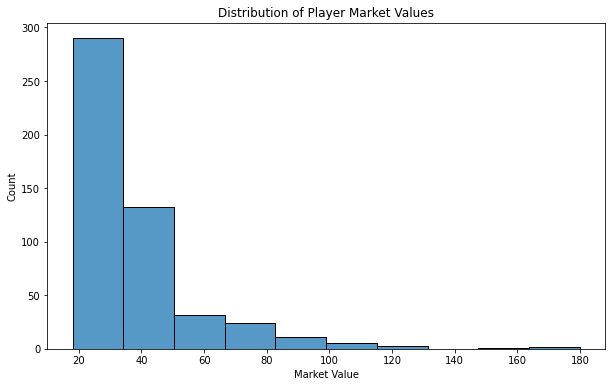

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of market values
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MarketValue', bins=10)
plt.xlabel('Market Value')
plt.ylabel('Count')
plt.title('Distribution of Player Market Values')
plt.show()

In [60]:
import plotly.graph_objects as go

# Count the occurrences of each nationality
nationality_counts = df['Nationality1'].value_counts()

# Plotting the distribution using a bar plot
fig = go.Figure(data=[go.Bar(x=nationality_counts.index, y=nationality_counts.values)])
fig.update_layout(
    title='Nationality Distribution of Top Players',
    xaxis_title='Nationality',
    yaxis_title='Count',
    xaxis_tickangle=-45
)
fig.show()


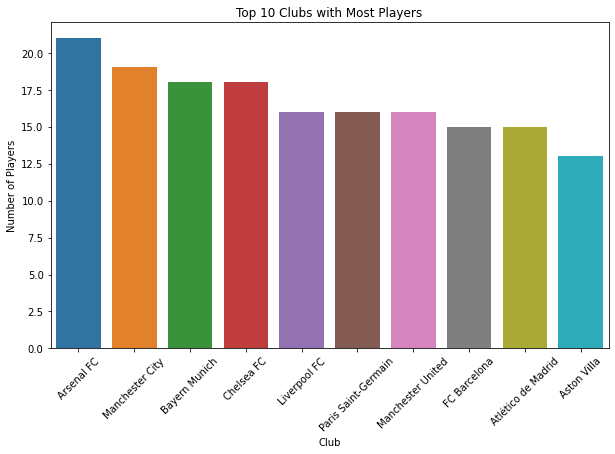

In [33]:
# Top clubs by number of players
top_clubs = df['Club'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_clubs.index, y=top_clubs.values)
plt.xlabel('Club')
plt.ylabel('Number of Players')
plt.title('Top 10 Clubs with Most Players')
plt.xticks(rotation=45)
plt.show()

In [41]:
import plotly.graph_objects as go

# Create the boxplot
fig = go.Figure()

# Add the box trace
fig.add_trace(go.Box(x=df['Age'], name='Age'))

# Add the scatter trace for outliers
outliers = df[df['Age'] > df['Age'].quantile(0.75) + 1.5 * (df['Age'].quantile(0.75) - df['Age'].quantile(0.25))]
fig.add_trace(go.Scatter(
    x=outliers['Age'],
    y=outliers['Age'],
    mode='markers',
    marker=dict(color='red'),
    name='Outliers'
))

# Add annotations for player names
for i, player in outliers.iterrows():
    fig.add_annotation(
        x=player['Age'],
        y=player['Age'],
        text=player['Player'],
        showarrow=True,
        arrowhead=2,
        arrowcolor='black',
        ax=0,
        ay=-40
    )

# Update the layout
fig.update_layout(
    title='Distribution of Player Ages',
    xaxis_title='Age',
    showlegend=False
)

# Show the plot
fig.show()

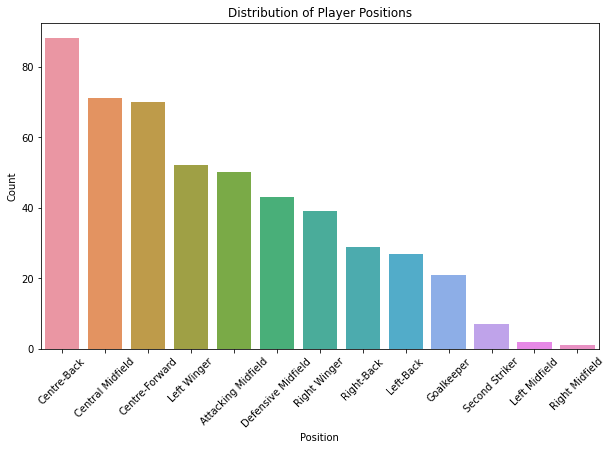

In [53]:
import seaborn as sns

# Count the occurrences of each position
position_counts = df['Position'].value_counts()

# Plotting the distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=position_counts.index, y=position_counts.values)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Distribution of Player Positions')
plt.xticks(rotation=45)
plt.show()


C:\Users\HAMMAD\AppData\Local\Temp\ipykernel_12984\1303223952.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



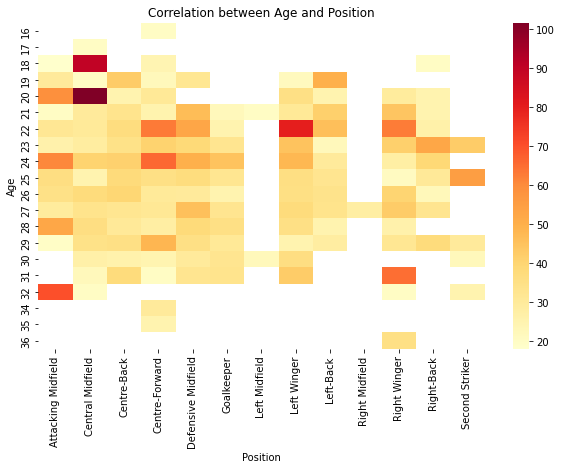

In [64]:
# Calculate the average market value for each age and position combination
age_position_market_value = df.groupby(['Age', 'Position'])['MarketValue'].mean().reset_index()

# Create a pivot table for heatmap
heatmap_data = age_position_market_value.pivot('Age', 'Position', 'MarketValue')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=heatmap_data, cmap='YlOrRd')
plt.xlabel('Position')
plt.ylabel('Age')
plt.title('Correlation between Age and Position')
plt.show()

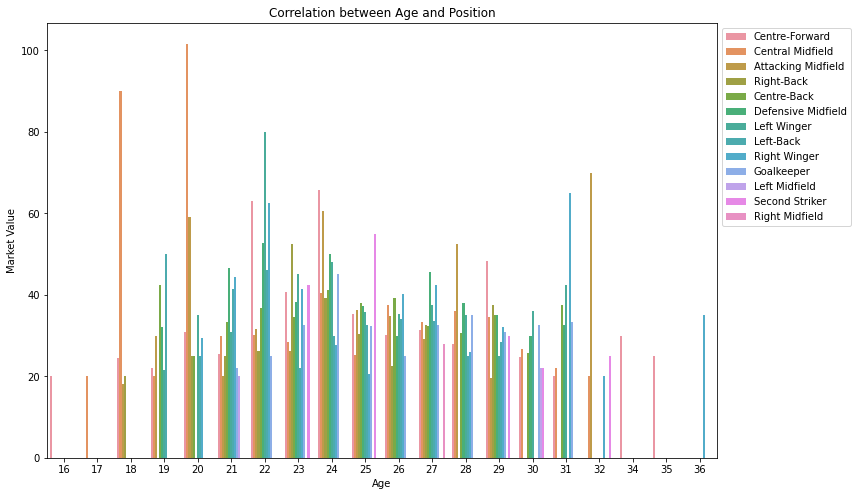

In [85]:
# Plotting the grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=age_position_market_value, x='Age', y='MarketValue', hue='Position')

plt.xlabel('Age')
plt.ylabel('Market Value')
plt.title('Correlation between Age and Position')

# Repositioning the legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


In [84]:
import plotly.graph_objects as go

# Calculate the distribution of positions
position_counts = df['Position'].value_counts()

# Set custom colors for each position
colors = ['#FFC107', '#E91E63', '#2196F3', '#4CAF50', '#9C27B0', '#FF5722']

# Create the donut pie chart
fig = go.Figure(data=[
    go.Pie(
        labels=position_counts.index,
        values=position_counts.values,
        hole=0.5,
        marker=dict(colors=colors),
        hoverinfo='label+percent',
        textinfo='value',
        textfont=dict(size=14),
    )
])

# Set layout properties
fig.update_layout(
    title='Counts of PLayers according to positions',
    showlegend=False,
)

# Show the plot
fig.show()


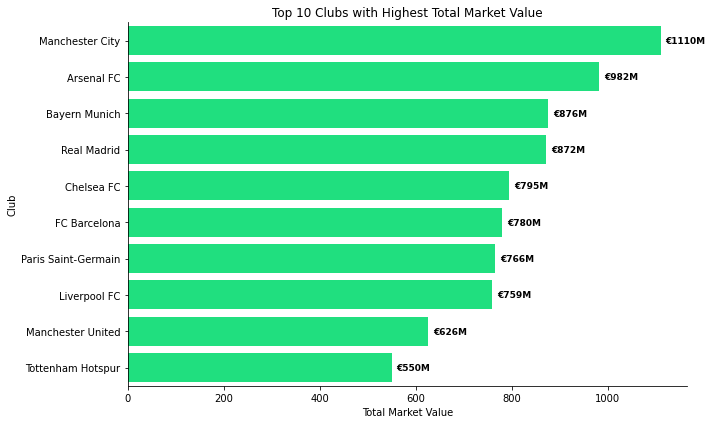

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette with sharp green color
custom_palette = ['#00FF7F'] * 10

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=club_total_market_value.values, y=club_total_market_value.index, palette=custom_palette)
plt.xlabel('Total Market Value')
plt.ylabel('Club')
plt.title('Top 10 Clubs with Highest Total Market Value')

# Remove spines
sns.despine()

# Add value labels to the bars
for i, value in enumerate(club_total_market_value.values):
    plt.text(value + 10, i, f'€{value}M', va='center', fontsize=9, fontweight='bold', color='black')

# Adjust spacing between bars
plt.tight_layout()

# Show the plot
plt.show()


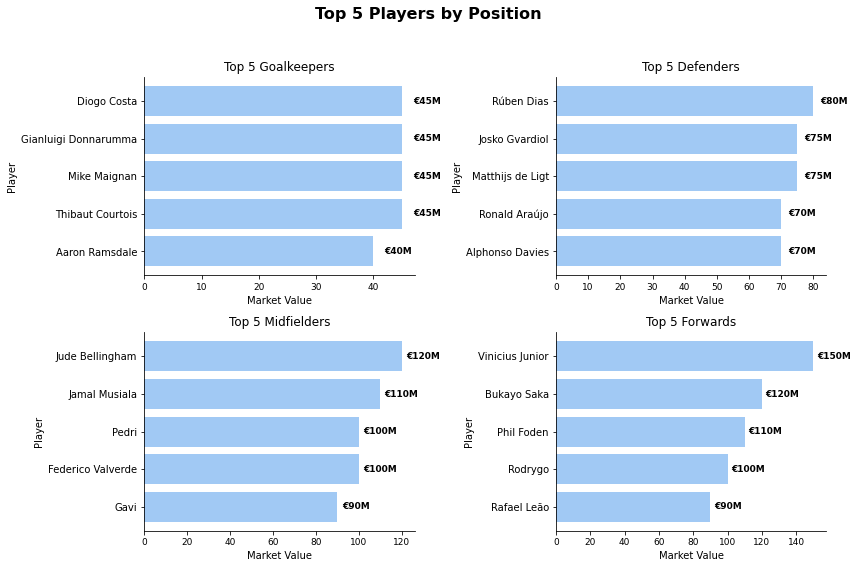

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette
sns.set_palette('pastel')

# Define position categories
positions = {
    'goalkeeper': 'Goalkeeper',
    'defender': ['Right-Back', 'Centre-Back', 'Left-Back'],
    'midfielder': ['Central Midfield', 'Defensive Midfield', 'Attacking Midfield', 'Left Midfield', 'Right Midfield'],
    'forward': ['Centre Forward', 'Left Winger', 'Right Winger', 'Second Striker']
}

# Initialize empty dictionaries to store top players for each position
top_players = {position: {} for position in positions}

# Filter the data and select the top 5 players for each position
for position, categories in positions.items():
    if isinstance(categories, str):
        top_players[position] = df[df['Position'] == categories].nlargest(5, 'MarketValue')
    else:
        top_players[position] = df[df['Position'].isin(categories)].nlargest(5, 'MarketValue')

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Top 5 Players by Position', fontsize=16, fontweight='bold')

# Iterate over the positions and plot the data
for (position, players), ax in zip(top_players.items(), axes.flat):
    ax.barh(players['Player'], players['MarketValue'], color=sns.color_palette()[0])
    ax.set_xlabel('Market Value')
    ax.set_ylabel('Player')
    ax.set_title(f'Top 5 {position.capitalize()}s')
    ax.invert_yaxis()  # Invert the y-axis for better readability

    # Customize tick labels and spines
    ax.tick_params(axis='x', labelsize=9)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add value labels to the bars
    for i, (player, value) in enumerate(zip(players['Player'], players['MarketValue'])):
        ax.text(value + 2, i, f'€{value}M', va='center', fontsize=9, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


In [82]:
import plotly.graph_objects as go

# Select the top 10 oldest and youngest players
oldest_players = df.nlargest(10, 'Age')
youngest_players = df.nsmallest(10, 'Age')

# Create a combined dataframe for both oldest and youngest players
combined_df = oldest_players.append(youngest_players)

# Create a scatter plot
fig = go.Figure(data=go.Scatter(
    x=combined_df['Age'],
    y=combined_df['MarketValue'],
    mode='markers',
    marker=dict(
        size=combined_df['MarketValue'] / 5,
        color=combined_df['Age'],
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title='Age'),
    ),
    text=combined_df.apply(lambda row: f"{row['Player']} ({row['Position']})", axis=1),
    hovertemplate='<b>%{text}</b><br>Market Value: €%{y}m<br>Age: %{x}',
))

# Set layout properties
fig.update_layout(
    title='Top 10 Oldest and Youngest Players by Market Value',
    xaxis_title='Age',
    yaxis_title='Market Value (Million Euros)',
    showlegend=False,
)

# Show the plot
fig.show()


C:\Users\HAMMAD\AppData\Local\Temp\ipykernel_12984\4200565699.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [86]:
average_market_value = df.groupby('Age')['MarketValue'].mean()

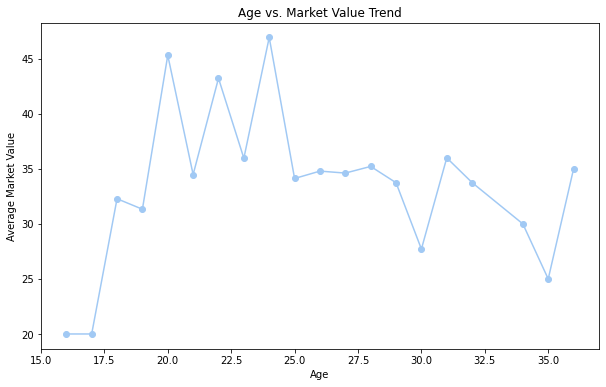

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(average_market_value.index, average_market_value.values, marker='o')
plt.xlabel('Age')
plt.ylabel('Average Market Value')
plt.title('Age vs. Market Value Trend')
plt.show()


<Figure size 720x432 with 0 Axes>

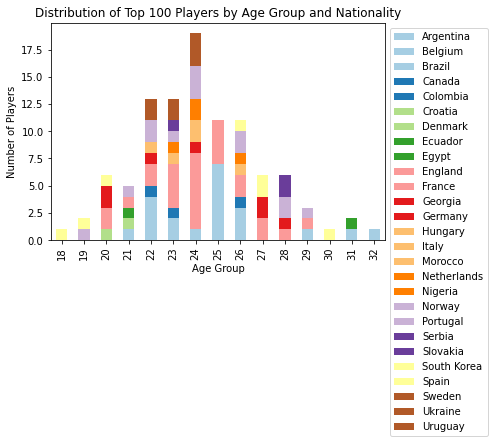

In [93]:
df=df.head(100)
# Subset the data for relevant columns
age_nationality = df[['Age', 'Nationality1']]

# Group the data by age group and nationality, and count the number of players
age_nationality_counts = age_nationality.groupby(['Age', 'Nationality1']).size().unstack()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the stacked bar plot
age_nationality_counts.plot(kind='bar', stacked=True, colormap='Paired')

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Number of Players')
plt.title('Distribution of Top 100 Players by Age Group and Nationality')


plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()


C:\Users\HAMMAD\AppData\Local\Temp\ipykernel_12984\3370828928.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HAMMAD\AppData\Local\Temp\ipykernel_12984\3370828928.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



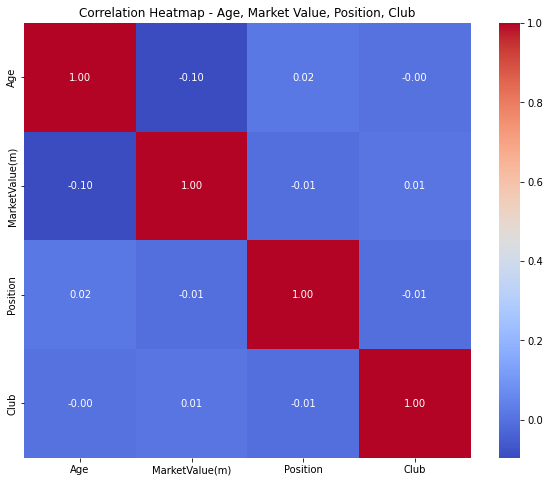

In [98]:
# Subset the relevant columns for correlation analysis
correlation_data = df[['Age', 'MarketValue(m)', 'Position', 'Club']]

# Convert the categorical variables (Position and Club) to numerical values
correlation_data['Position'] = correlation_data['Position'].astype('category').cat.codes
correlation_data['Club'] = correlation_data['Club'].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot
plt.title('Correlation Heatmap - Age, Market Value, Position, Club')

# Show the plot
plt.show()
